# Learning the best estimator for a Gaussian linear inverse problem

This is a brief demo of a method for learning the best estimator for a Gaussian inverse problem. The demo is described in Section 6.1 of

* G. Holler,  ["How many samples are needed to reliably approximate the best linear estimator for a linear inverse problem?"](https://arxiv.org/abs/2107.00215), arXiv preprint arXiv:2107.00215, 2021.


To create a Gaussian inverse problem, we create an instance of the ```GaussianInverseProblem``` class from the module ```invprob``` using the options:

- ```dim_X=N```: This sets the dimension of the unknown parameter $X$ to $N$.
- ```dim_Y=M```: This sets the dimension of the data $Y$ to $M$.
- ```forward_operator='random'```: This lets the entries of the forward operator A be realizations of independent standard normal random variables.
 

In [1]:
import numpy as np
from learn_lmmse import invprob


N = 16
M = 16
my_gaussian_problem = invprob.GaussianInverseProblem(forward_operator='random', 
                                             dim_X=N,
                                             dim_Y=M,
                                             seed=2**16)

To perform the experiment we use the ```eval_gaussian_prediction``` method from our module ```evalmethod```.

In [2]:
from learn_lmmse import evalmethod as eval
import time

time_start = time.time()
data_gaussian = eval.eval_gaussian_prediction(my_gaussian_problem, n_exp = 300)
print("needed time: %s seconds" % (time.time() - time_start))

needed time: 4.618038654327393 seconds


The results of the experiments are stored in the dictionary ```data_gaussian```. To display the mean squared error in the jth component for the ith experiment for $\varepsilon \in \{1/16, 1/4, 1/2, 1\}$, we execute the following code:

In [3]:
epsilon = 1/16
i = 1
j = 0

n_train = str(np.ceil(M/epsilon).astype('int')+M+1)

error_ij = data_gaussian['results'][str(n_train)]['mse_lstsq'][i,j]
print(error_ij)

0.06129138008999583


To plot the empirical tail distribution of the mean squared error of the least squares estimator we use 
the ```plot_tail_fancy``` method from the module ```evalmethod```.

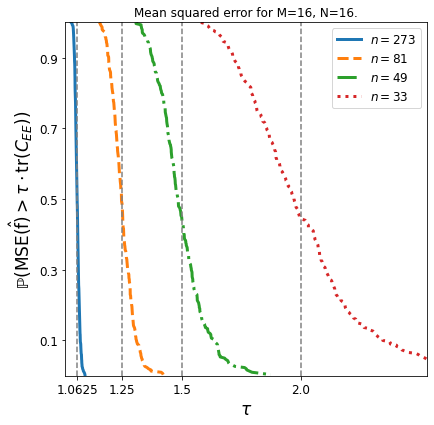

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.5,6.5))
eval.plot_tail_fancy(ax,
                     data_gaussian, 
                     error_type= 'mse_',
                     fontsize=12,
                     labelsize=17,
                     tick_labelsize=12,
                     linewidth=3)
ax.set_title('Mean squared error for' 
             + ' M=' + str(data_gaussian['dim_Y']) +',' 
             + ' N=' + str(data_gaussian['dim_X']) + '.')
plt.show()